 Pemeriksaan pada Library

In [1]:
import pandas as pd
print("pandas version: {}".format(pd.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

pandas version: 1.1.2
scikit-learn version: 0.19.1


# Pendahuluan

In [40]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [3]:
dataset = pandas.read_csv('D:/Data/Semester 7/Penambangan Data (DAMI)/Praktikum/week 6/iris.csv')

In [4]:
dataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
dataset.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [6]:
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


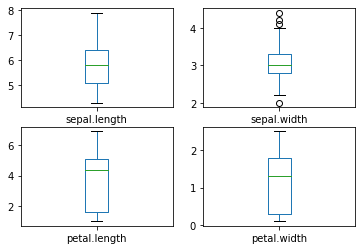

In [7]:
# box and whisker plots
dataset.plot (kind='box', subplots=True, layout=(2,2),
             sharex=False,sharey=False)
plt.show()

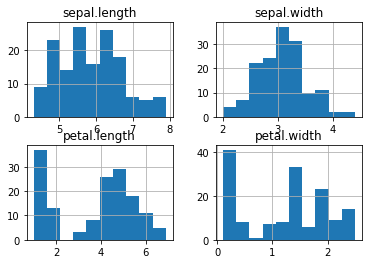

In [8]:
#histogram
dataset.hist()
plt.show()

# Uraian Latihan

## Latihan 1 | Binary Classification with Support Vector Machines in scikit-learn

In [9]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.predict([[2., 2.]])

array([1])

In [11]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [12]:
# get indices of support vectors
clf.support_

array([0, 1])

In [13]:
# get number of support vectors for each class
clf.n_support_

array([1, 1])

## Latihan 2 | Multi-class Classification with Support Vector Machines in scikit-learn

In [14]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(gamma='auto', decision_function_shape='ovo')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [16]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In [17]:
lin_clf = svm.LinearSVC()
lin_clf.fit (X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [18]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

## Latihan 3 | Implementing and Visualizing SVM in Python with CVXOPT

### Latihan 3.1 | Generating the data


x (100, 2) y (100,)


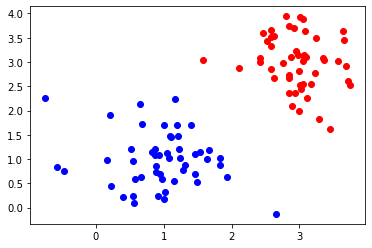

In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

DIM = 2
COLORS = ['red', 'blue']

# 2-D mean of ones
M1 = np.ones((DIM,))
# 2-D mean of threes
M2 = 3 * np.ones((DIM,))
# 2-D covariance of 0.3
C1 = np.diag(0.3 * np.ones((DIM,)))
# 2-D covariance of 0.2
C2 = np.diag(0.2 * np.ones((DIM,)))

def generate_gaussian(m, c, num):
    return np.random.multivariate_normal(m, c, num)
def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range (len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    plt.show()
    

NUM = 50
if __name__ == '__main__':
     # generate 50 points from gaussian 1
     x1 = generate_gaussian(M1, C1, NUM)
     # labels
     y1 = np.ones((x1.shape[0],))
     # generate 50 points from gaussian 2
     x2 = generate_gaussian(M2, C2, NUM)
     y2 = -np.ones((x2.shape[0],))
     # join
     x = np.concatenate((x1, x2), axis = 0)
     y = np.concatenate((y1, y2), axis = 0)
     print('x {} y {}'.format(x.shape, y.shape))
     plot_data_with_labels(x, y)
     # write
     with open('gaussiandata.pickle', 'wb') as f:
         pickle.dump((x, y), f)

### Latihan 3.2 | Fitting an SVM

In [20]:
!pip install cvxopt

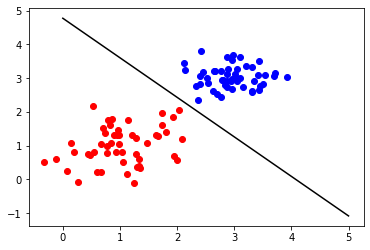

In [4]:
import numpy as np
import pickle, sys
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
COLORS = ['red', 'blue']
def read_data(f):
    with open('gaussiandata.pickle', 'rb') as f: 
        data = pickle.load(f)
    x, y = data[0], data[1] 
    return x, y
def fit(x, y):
    NUM = x.shape[0] 
    DIM = x.shape[1]
    # we'll solve the dual 
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1))) 
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False 
    sol = solvers.qp(P, q, G, h, A, b) 
    alphas = np.array(sol['x'])
    return alphas
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
def plot_separator(ax, w, b):
    slope = -w[0] / w[1] 
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')
if __name__ == '__main__':
    x, y = read_data(sys.argv[1])
    # fit svm classifier
    alphas = fit(x, y)
    # get weights
    w = np.sum(alphas * y[:, None] * x, axis = 0)
    # get bias
    cond = (alphas > 1e-4).reshape(-1)
    b = y[cond] - np.dot(x[cond], w)
    bias = b[0]
    # normalize
    norm = np.linalg.norm(w)
    w, bias = w / norm, bias / norm
    # show data and w
    fig, ax = plt.subplots()
    plot_separator(ax, w, bias)
    plot_data_with_labels(x, y, ax)
    plt.show()

In [54]:
def plot_separator(ax, w, b):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')

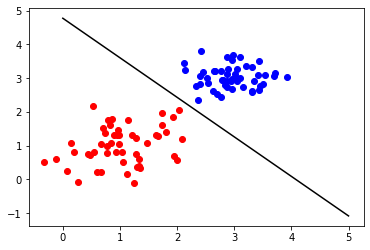

In [3]:
import numpy as np
import pickle, sys
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
COLORS = ['red', 'blue']
def read_data(f):
    with open('gaussiandata.pickle', 'rb') as f: 
        data = pickle.load(f)
    x, y = data[0], data[1] 
    return x, y
def fit(x, y):
    NUM = x.shape[0] 
    DIM = x.shape[1]
    # we'll solve the dual 
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1))) 
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False 
    sol = solvers.qp(P, q, G, h, A, b) 
    alphas = np.array(sol['x'])
    return alphas
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
def plot_separator(ax, w, b):
    slope = -w[0] / w[1] 
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')
if __name__ == '__main__':
    x, y = read_data(sys.argv[1])
    # fit svm classifier
    alphas = fit(x, y)
    # get weights
    w = np.sum(alphas * y[:, None] * x, axis = 0)
    # get bias
    cond = (alphas > 1e-4).reshape(-1)
    b = y[cond] - np.dot(x[cond], w)
    bias = b[0]
    # normalize
    norm = np.linalg.norm(w)
    w, bias = w / norm, bias / norm
    # show data and w
    fig, ax = plt.subplots()
    plot_separator(ax, w, bias)
    plot_data_with_labels(x, y, ax)
    plt.show()

x (100, 2) y (100,)


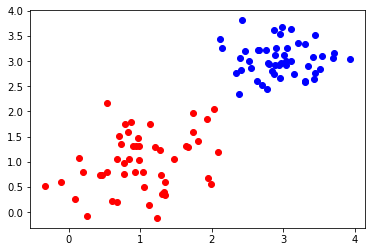

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

DIM = 2
COLORS = ['red', 'blue']

# 2-D mean of ones
M1 = np.ones((DIM,))
# 2-D mean of threes
M2 = 3 * np.ones((DIM,))
# 2-D covariance of 0.3
C1 = np.diag(0.3 * np.ones((DIM,)))
# 2-D covariance of 0.2
C2 = np.diag(0.2 * np.ones((DIM,)))
             
def generate_gaussian(m, c, num): 
    return np.random.multivariate_normal(m, c, num)
             
def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    plt.show()
             
NUM = 50
if __name__ == '__main__':
             
    # generate 50 points from gaussian 1
    x1 = generate_gaussian(M1, C1, NUM)
    # labels
    y1 = np.ones((x1.shape[0],))
    # generate 50 points from gaussian 2
    x2 = generate_gaussian(M2, C2, NUM)
    y2 = -np.ones((x2.shape[0],))
    # join
    x = np.concatenate((x1, x2), axis = 0)
    y = -np.concatenate((y1, y2), axis = 0)
    print('x {} y {}'.format(x.shape, y.shape))
    plot_data_with_labels(x,y)
    # write
    with open('gaussiandata.pickle', 'wb') as f:
        pickle.dump((x, y), f)

# Latihan

a. SVC with linear kernel

In [5]:
import numpy as np
x = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
C=0.1
clf = SVC(kernel='linear', C=C).fit(x,y)
clf.fit(x,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
print(clf.predict([[-0.8,-1]]))

[1]


b. LinearSVC (linear kernel)

In [29]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
x,y = make_classification(n_features=4,random_state=0)
clf = LinearSVC(random_state=0,tol=1e-5)
clf.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [30]:
print(clf.coef_)

[[0.0855181  0.39414765 0.49848052 0.37514311]]


In [31]:
print(clf.intercept_)

[0.28417574]


In [32]:
print(clf.predict([[0,0,0,0]]))

[1]


c. SVC with RBF kernel

In [33]:
import numpy as np
x = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
clf = SVC(kernel='rbf', gamma=0.7, C=C).fit(x,y)
clf.fit(x,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
print(clf.predict([[-0.8,-1]]))

[1]


d. SVC with polynomial (degree 3) kernel.

In [35]:
import numpy as np
x = np.array([[-1,-1],[-2,-1],[1,1],[2,1]])
y = np.array([1,1,2,2])
from sklearn.svm import SVC
clf = SVC(kernel='poly', degree=3, C=C).fit(x, y)
clf.fit(x,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
print(clf.predict([[-0.8,-1]]))

[1]


e. Plot visualisasi hasil SVC with linear kernel, LinearSVC (linear kernel), SVC with RBF kernel, dan
SVC with polynomial (degree 3) kernel dengan menggunakan iris data.

Automatically created module for IPython interactive environment


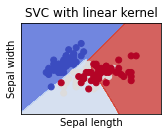

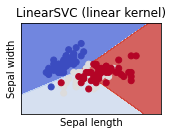

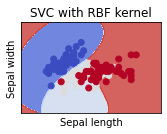

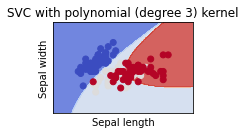

In [39]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
                     # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02 # step size in the mesh
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will SSIGN  color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()